In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 

from lumicks import pylake

%matplotlib inline
print(np.__version__)
print(pylake.__version__)
print(matplotlib.__version__)

1.16.2
0.3.1
2.2.4


# Python

[Download this page as a Jupyter notebook](_downloads/python_load_files.ipynb)

The script for this page with sample data can be downloaded from here.

This page explains how to open .h5df files  in Python (Jupyter Notebook) and what you can do with each variable

You would need to use Pylake to easly access data in the exported files. You only have to run this script once to make sure Pylake is installed:

In [7]:
!pip install lumicks.pylake

/bin/sh: 1: pip: not found


If it says “Requirement already satisfied”, then no need to run this each time you run a script.

Load libraries so that you can analyze the exported data:

In [8]:
# Pylake package that LUMICKS provides
import lumicks.pylake as pylake

# standard python toolkit for more elaborate mathematical operations
import numpy as np

# plotting library
import matplotlib.pyplot as plt

## Load Files

To load one file, we need to run the following lines of code:

In [9]:
filename = r'/mnt/d/ctrap/data/2019-03-29 trap training/20190328-190753 1mM Spermine 1uM DNA Scan 19.h5'
f = pylake.File(filename)
print(f)

File root metadata:
- Bluelake version: 1.5.5
- Description: 1mM Spermine 1uM DNA. 10 percent Cy3 labeled DNA, no biotin label. widom 601 (MP vector amplicon). 

- Experiment: 1mM Spermine 1uM DNA
- Export time (ns): 1553814473028346000
- File format version: 2
- GUID: {A0F6400C-7A0B-46E0-BE95-0BAA97F6D7D4}

Calibration:
  55:
    Force 1x
    Force 1y
    Force 2x
    Force 2y
    JSON:
    - Data type: object
    - Size: 1
Confocal diagnostics:
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1
  Excitation Laser Green:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1
  Excitation Laser Red:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1
Diagnostics:
  Pressure:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1318
Distance:
  Distance 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 5772
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 26058553
  Force 1y:
  -

In Python, we can also get a list of all the files in one folder, and we can store this list and load the files one by one:

In [10]:
# load a library to look for files in a folder
import glob

# select the folder, here we search for .h5 files in the folder where you're running the script in
files = glob.glob('../data/2019-03-29 trap training/*Scan*.h5')
print("found {} files in folder".format(len(files)))

for file in files:
    print(file)
    f = pylake.File(file)
    # do the operation on each file here

found 6 files in folder
../data/2019-03-29 trap training/20190328-190753 1mM Spermine 1uM DNA Scan 19.h5
../data/2019-03-29 trap training/20190328-191346 1mM Spermine 1uM DNA Scan 19.h5
../data/2019-03-29 trap training/20190328-191353 1mM Spermine 1uM DNA Scan 18.h5
../data/2019-03-29 trap training/20190328-201848 1mM Spermine 1uM DNA Scan 17.h5
../data/2019-03-29 trap training/20190328-201941 1mM Spermine 1uM DNA Scan 16.h5
../data/2019-03-29 trap training/20190328-202045 1mM Spermine 1uM DNA Scan 15.h5


## List the Content of a File

We can view the structure of a loaded file like this:

In [2]:
#filename = 'Data/20181121-174038 Marker Single tether.h5'
f = pylake.File(filename)
print(f)

SyntaxError: invalid syntax (<ipython-input-2-17583c133125>, line 2)

There are two types of variables in these files in general:

* Time-traces, e.g. force, distance recordings, confocal recordings, photon count
  
* Events, e.g. trap calibration, zeroing the force
  
Let’s look at the first type.

## Access Time-Traces / Channels

* “f” is the file that you previously selected
  
* the first bracket is the type of variable you’re interested in. These are the leftmost items in the list (e.g. Distance or Force)
  
* the second bracket is the secondary item in that list. E.g. “Force 1x” is located inside “Force HF”
  
So a sample code would be like this:

In [12]:
force1x = f["Force HF"]["Force 1x"]

# or

distance = f['Distance']['Distance 1']

In [13]:
for fxn in dir(force1x):
    if not fxn.startswith('_'):
        print(fxn)

data
downsampled_by
labels
plot
sample_rate
timestamps


Then you can use different commands on these files:

* `.plot()` to plot these items
  
* `['0s':'10s']` to slice them
  
* `.sample_rate` to obtain the sampling rate of this variable
  
* `.downsampled_by(100)` to downsample the by 100 fold
  
* `.data` to obtain the raw data from these files
  
* `.timestamps` to obtain the time data ponts from this data (note that time is in nanoseconds)
  
AND you can also combine these command

`.plot()` plots the different measured parameters, e.g. force:

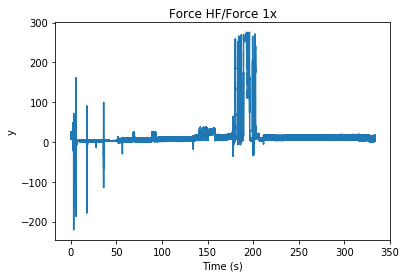

In [14]:
plt.figure()

force1x.plot()

`['1s':'10s']` slices them to look at only a certain section of the data:

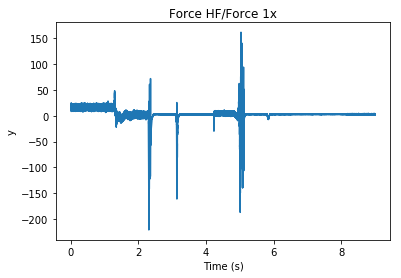

In [15]:
force1x['1s':'10s'].plot()

`.sample_rate` gives you the sampling rate in Hz:

In [19]:
sampling_rate = force1x.sample_rate
print(sampling_rate)
force_time = (force_time - force_time[0]) * 1e-9
print(time_stamps)

78125
[1.55380977e+27 1.55380977e+27 1.55380977e+27 ... 1.55381010e+27
 1.55381010e+27 1.55381010e+27]


`.downsampled_by(100)` downsamples the force to a certain sampling frequency:

In [13]:
final_sampling_rate = 100 #Hz
force1x_100Hz = force1x.downsampled_by(int( sampling_rate / final_sampling_rate ))

Now we can plot the downsampled force with the original:

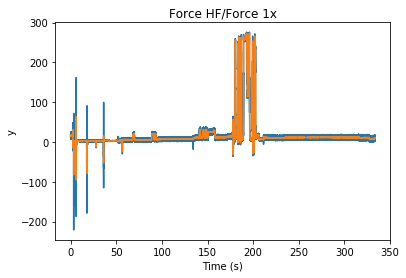

In [14]:
force1x.plot()
force1x_100Hz.plot()

We can also get the RAW data out and plot them ourselves:

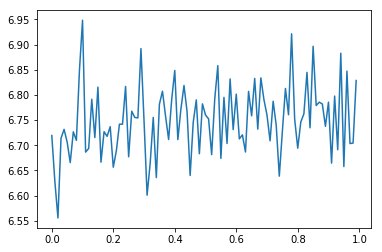

In [27]:
force_data = force1x_100Hz['100s':'150s'].data
force_time = force1x_100Hz['100s':'150s'].timestamps
force1x_100Hz_subslice = force1x_100Hz['10s':'12s']

""" Please NOTE that the time data are in NANOSECONDS

    We can convert them to seconds in this way, you subtract the first (zeroth) value, then divide by 1e9 (ten to the power of nine)
"""

force_time = (force_time - force_time[0]) * 1e-9

# plot them
plt.plot(force_time[:100], force_data[:100])

## Plot Force-Distance Curve

We can make the same plot as before with the obtained data:

Text(0,0.5,'Force (pN)')

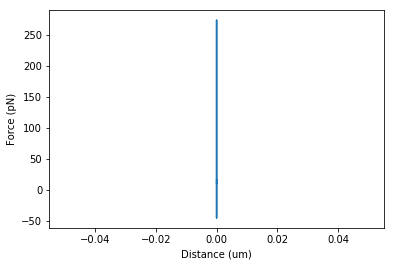

In [28]:
force_data = f["Force LF"]["Force 1x"].data
distance_data = f["Distance"]["Distance 1"].data

plt.plot(distance_data, force_data)

"""Now you have to label the axis yourselves"""

plt.xlabel("Distance (um)")
plt.ylabel("Force (pN)")

## Access Events (e.g. calibration)

These are the second type of variables, that are recorded at one point in time and not continuously.

In terms of calibration events, we have 1 in the dataset that is named “123”. We can access it the same way:

In [29]:
params = f["Calibration"]["55"]["Force 1x"]

We can also apply certain functions to these files:

* `.h5.attrs.items()` to get a list of what was recorded during this event
  
* `.attrs.get()` to obtain one of the parameters in the marker
  
`.h5.attrs.items()` can print the list of calibration paramenters:

In [36]:
attributes = list(params.h5.attrs.items())

for attr in attributes:
    print(attr)

print(params.h5.attrs['Bead diameter (um)'])

('Bead diameter (um)', 4.42)
('D (V^2/s)', 0.13571619999022305)
('Fit range (max.) (Hz)', 23000.0)
('Fit range (min.) (Hz)', 300.0)
('Fit tolerance', 1e-07)
('Kind', 'Reset offset to zero')
('Max iterations', 10000.0)
('Number of samples', 250000.0)
('Offset (pN)', -135.9581281864895)
('Points per block', 200.0)
('Rd (um/V)', 0.8481380647775624)
('Response (pN/V)', 676.8979185460395)
('Rf (pN/V)', 676.8979185460395)
('Sample rate (Hz)', 78125.0)
('Sign', 1.0)
('Start time (ns)', 1553807793087392400)
('Stop time (ns)', 1553807796287392400)
('Temperature (C)', 22.0)
('Viscosity (Pa*s)', 0.001002)
('alpha', 0.3150970705707482)
('backing (%)', 97.97688277669849)
('chi_squared_per_deg', 1.1586201584874878)
('err_D', 0.00558862048722326)
('err_alpha', 0.005743097941572989)
('err_f_diode', 307.71446080339564)
('err_fc', 82.55510825150745)
('f_diode (Hz)', 7667.423133458266)
('fc (Hz)', 3043.095886869405)
('kappa (pN/nm)', 0.7980987372893901)
('ps_fitted', 0.0)
('ps_model_fit', 0.0)
4.42


`.attrs.get()` can grab the parameter of interest, e.g. stiffness:

In [37]:
stiffness = params.h5.attrs.get("kappa (pN/nm)")
print(stiffness)

0.7980987372893901
